# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data
2. Cleaning the data
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com).

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [1]:
# Web scraping, pickle imports
import requests                   #Used to make HTTP requests to web pages
from bs4 import BeautifulSoup     #parsing HTML and extracting data
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text #downloads the HTML content from the url
    soup = BeautifulSoup(page, "lxml") #parses the HTML using the lxml parser

    # text = [p.text for p in soup.find(class_="post-content")]
    # print(url)
    # return text

    content_div = soup.find("div", class_="elementor-widget-theme-post-content")
    if content_div is not None:
        # Extract text from all paragraphs inside the content
        text = [p.text for p in content_div.find_all("p")]
        return text
    else:
        print(f"Could not find the transcript content at {url}")
        return []

# 19 comedians in total
# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/your-friend-nate-bargatze-transcript/',
        'https://scrapsfromtheloft.com/comedy/jamie-foxx-what-had-happened-was-transcript/',
        'https://scrapsfromtheloft.com/comedy/fortune-feimster-crushing-it-transcript/',
        'https://scrapsfromtheloft.com/comedy/jeff-dunham-scrooged-up-holiday-special-transcript/',
        'https://scrapsfromtheloft.com/comedy/jim-gaffigan-the-skinny-transcript/',
        'https://scrapsfromtheloft.com/comedy/hasan-minhaj-off-with-his-head-transcript/',
        'https://scrapsfromtheloft.com/comedy/tim-dillon-this-is-your-country-transcript/ ',
        'https://scrapsfromtheloft.com/comedy/ronny-chieng-love-to-hate-it-transcript/',
        'https://scrapsfromtheloft.com/comedy/paul-reiser-life-death-and-rice-pudding-transcript/',
        'https://scrapsfromtheloft.com/comedy/seth-meyers-dad-man-walking-transcript/',
        'https://scrapsfromtheloft.com/comedy/tom-papa-home-free-transcript/',
        'https://scrapsfromtheloft.com/comedy/anthony-jeselnik-bones-and-all-transcript/',
       'https://scrapsfromtheloft.com/comedy/ellen-degeneres-for-your-approval-transcript/',
       'https://scrapsfromtheloft.com/comedy/deon-cole-ok-mister-2024-transcript/',
       'https://scrapsfromtheloft.com/comedy/ahir-shah-ends-transcript/',
       'https://scrapsfromtheloft.com/comedy/langston-kerman-bad-poetry-transcript/',
       'https://scrapsfromtheloft.com/comedy/joe-devito-middle-aged-dating-transcript/',
       'https://scrapsfromtheloft.com/comedy/joe-rogan-burn-the-boats-transcript/',
       'https://scrapsfromtheloft.com/comedy/hannah-berner-we-ride-at-dawn-transcript/']

# Comedian names
comedians = ['nate', 'jamie', 'fortune', 'jeff', 'jim', 'hasan', 'tim', 'ronny', 'paul', 'seth', 'tom', 'anthony', 'ellen', 'cole', 'asir', 'kerman', 'devito', 'rogan', 'berner']

In [2]:
#  Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

In [3]:
print(transcripts)

[['Your Friend, Nate Bargatze (2024)\nGenre: Comedy, Stand-up\nDirector: Ryan Polito\nStar: Nate Bargatze\nPremiered on Netflix on December 24, 2024', 'Nate Bargatze’s 2024 Netflix stand-up special, Your Friend, Nate Bargatze, is a comedic journey through the absurdities of everyday life. With his signature deadpan delivery, Bargatze riffs on relatable topics like pizza-ordering dilemmas, domestic quirks with his frugal wife, and parenting mishaps, weaving personal anecdotes with exaggerated humor. The show opens with a spirited introduction from his daughter, setting the stage for a performance rooted in self-deprecating humor, small-town nostalgia, and sharp observations about modern absurdities. Bargatze’s storytelling shines as he recounts his days as a water meter reader, his failed attempts to manage daily routines without his wife’s guidance, and his humorous take on aging and familial dynamics.', 'The special thrives on Bargatze’s ability to find comedy in the mundane, whether 

In [4]:
# Pickle files for later use
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [5]:
# Load pickled files
data = {}                         #empty dictionary to store all the comedians' transcripts
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
# keys are the comedian names
data.keys()

dict_keys(['nate', 'jamie', 'fortune', 'jeff', 'jim', 'hasan', 'tim', 'ronny', 'paul', 'seth', 'tom', 'anthony', 'ellen', 'cole', 'asir', 'kerman', 'devito', 'rogan', 'berner'])

In [7]:
# More checks
data['nate']

['Your Friend, Nate Bargatze (2024)\nGenre: Comedy, Stand-up\nDirector: Ryan Polito\nStar: Nate Bargatze\nPremiered on Netflix on December 24, 2024',
 'Nate Bargatze’s 2024 Netflix stand-up special, Your Friend, Nate Bargatze, is a comedic journey through the absurdities of everyday life. With his signature deadpan delivery, Bargatze riffs on relatable topics like pizza-ordering dilemmas, domestic quirks with his frugal wife, and parenting mishaps, weaving personal anecdotes with exaggerated humor. The show opens with a spirited introduction from his daughter, setting the stage for a performance rooted in self-deprecating humor, small-town nostalgia, and sharp observations about modern absurdities. Bargatze’s storytelling shines as he recounts his days as a water meter reader, his failed attempts to manage daily routines without his wife’s guidance, and his humorous take on aging and familial dynamics.',
 'The special thrives on Bargatze’s ability to find comedy in the mundane, whether

## Cleaning The Data

In [8]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [9]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [10]:
data_combined

{'nate': ["Your Friend, Nate Bargatze (2024)\nGenre: Comedy, Stand-up\nDirector: Ryan Polito\nStar: Nate Bargatze\nPremiered on Netflix on December 24, 2024 Nate Bargatze’s 2024 Netflix stand-up special, Your Friend, Nate Bargatze, is a comedic journey through the absurdities of everyday life. With his signature deadpan delivery, Bargatze riffs on relatable topics like pizza-ordering dilemmas, domestic quirks with his frugal wife, and parenting mishaps, weaving personal anecdotes with exaggerated humor. The show opens with a spirited introduction from his daughter, setting the stage for a performance rooted in self-deprecating humor, small-town nostalgia, and sharp observations about modern absurdities. Bargatze’s storytelling shines as he recounts his days as a water meter reader, his failed attempts to manage daily routines without his wife’s guidance, and his humorous take on aging and familial dynamics. The special thrives on Bargatze’s ability to find comedy in the mundane, whethe

In [11]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
anthony,"[crowd cheering] Thank you all for coming to the show tonight. I do appreciate it. In case you guys don’t know why I’m on tour right now, as of a ..."
asir,"Ahir Shah: Ends (2024)\nGenre: Stand-up Comedy, Social Commentary\nDirector: Peter Orton\nWriter: Ahir Shah\nStar: Ahir Shah In this stand-up come..."
berner,"[audience cheering] [announcer] Gigglers, are you ready? Please welcome Hannah Berner! [audience cheering] [“Sonata Slay” by Chris B. Harris playi..."
cole,[“Post That” by Deon Cole and Terry Hunter playing] [audience cheering and applauding] [cheering and applause intensifies] [music fades] [audience...
devito,"Dating Over 40 Is Like Thrift Store Shopping. Joe DeVito – Full Special Comedian Joe DeVito reflects on the challenges of being single at 50, part..."
ellen,Ellen DeGeneres: For Your Approval is less a comedy special and more an hour-long ego massage for the embattled host. What should have been a triu...
fortune,[rock music playing] ♪ Looking on the bright side ♪\n♪ I just wanna feel good vibes Good times ♪\n♪ Looking on the bright side ♪\n♪ I just wanna l...
hasan,"[dramatic rap music playing] [audience cheering and applauding] San Jose, what’s up? [audience cheering and applauding] Nice to see you! What’s ha..."
jamie,[siren wailing] [somber music playing] [Harvey Levin] Jamie Foxx suffered a very serious medical emergency. Bad enough that family members flew in...
jeff,Jeff Dunham’s “Scrooged-Up Holiday Special” brings his signature comedic edge to the holiday season in Milwaukee’s iconic Pabst Theater. The show ...


In [12]:
# Let's take a look at the transcript for Rogan
data_df.transcript.loc['rogan']

'Joe Rogan, performing live in San Antonio, expresses his love for Texas, recounts his move there, and makes humorous observations about Texas weed, Buc-ee’s gas stations, and aliens. He discusses COVID-19 skepticism, political and social commentary, and his experiences with controversy, including Fear Factor and vaccine misinformation. Rogan also shares his thoughts on societal changes, the complexities of language, and the absurdity of certain behaviors and beliefs. Throughout, he maintains a comedic, irreverent tone, engaging the audience with his unique blend of humor and provocative insights. * * * [announcer] And now, live from San Antonio, this is Joe Rogan. [audience cheering and applauding] What’s up? What’s happening? San Antonio! The world got weird, but we’re all together. [audience cheering and applauding] We’re all together. And I wouldn’t wanna be anywhere else but here in Texas. Fuck, yeah. [audience cheers] Fuck, yeah. Thanks for coming out, folks. Thank you very much,

In [14]:
# Apply a first round of text cleaning techniques
import re
import string

#re.sub(pattern, replacement, string)

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower() # lowercase
    text = re.sub('\[.*?\]', '', text) # removing text in square brackets like [audience cheering]
    # . -> matches any character except a newline
    # * -> Matches 0 or more occurrences of the preceding character or group
    # By default, regex is greedy: it tries to match as much text as possible. Adding ? makes it lazy, so it stops matching as soon as the pattern is satisfied.
    # Greedy (\[.*\]): Matches everything: [audience cheering] some text [applause].
    # Lazy (\[.*?\]): Matches only [audience cheering] first, then [applause].
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removing punctuation marks ,,Match any single character from this list
    text = re.sub('\w*\d\w*', '', text) # removing a word that contains a number eg abc123
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))

data_clean

,transcript
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys don’t know why i’m on tour right now as of a couple of months ag...
asir,ahir shah ends \ngenre standup comedy social commentary\ndirector peter orton\nwriter ahir shah\nstar ahir shah in this standup comedy special ahi...
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do ha...
cole,man that mean a lot hello los angeles how y’all doing thank you for coming out i’d like to just jump into the shit if you don’t mind y’all ...
devito,dating over is like thrift store shopping joe devito – full special comedian joe devito reflects on the challenges of being single at particular...
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...
fortune,♪ looking on the bright side ♪\n♪ i just wanna feel good vibes good times ♪\n♪ looking on the bright side ♪\n♪ i just wanna live wanna live ♪\n♪ ...
hasan,san jose what’s up nice to see you what’s happening what’s going on bay area listen to me tonight tonight’s gonna be special san jose you know...
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor...
jeff,jeff dunham’s “scroogedup holiday special” brings his signature comedic edge to the holiday season in milwaukee’s iconic pabst theater the show bl...


In [19]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text) # This expression removes special typographic characters like smart quotes (‘’, “”) and ellipses (…).
    text = text = re.sub('\n', ' ', text) # This ensures that text broken across multiple lines is concatenated with spaces between words, preserving readability.
    return text

round2 = lambda x: clean_text_round2(x)

In [20]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago ...
asir,ahir shah ends genre standup comedy social commentary director peter orton writer ahir shah star ahir shah in this standup comedy special ahir sh...
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do ha...
cole,man that mean a lot hello los angeles how yall doing thank you for coming out id like to just jump into the shit if you dont mind yall good...
devito,dating over is like thrift store shopping joe devito – full special comedian joe devito reflects on the challenges of being single at particular...
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...
fortune,♪ looking on the bright side ♪ ♪ i just wanna feel good vibes good times ♪ ♪ looking on the bright side ♪ ♪ i just wanna live wanna live ♪ ♪ live...
hasan,san jose whats up nice to see you whats happening whats going on bay area listen to me tonight tonights gonna be special san jose you know wha...
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor...
jeff,jeff dunhams scroogedup holiday special brings his signature comedic edge to the holiday season in milwaukees iconic pabst theater the show blends...


In [25]:
def clean_text_round3(text):
    text = re.sub('\s+', ' ', text) # This replaces sequences of one or more whitespace characters (spaces, tabs, etc.) with a single space.
    text = text.strip() # not regex but it removes any extra space at beginning or end of the string.
    return text

round3 = lambda x: clean_text_round3(x)


In [26]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round3))
data_clean

,transcript
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago i...
asir,ahir shah ends genre standup comedy social commentary director peter orton writer ahir shah star ahir shah in this standup comedy special ahir sha...
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do have to a...
cole,man that mean a lot hello los angeles how yall doing thank you for coming out id like to just jump into the shit if you dont mind yall good with t...
devito,dating over is like thrift store shopping joe devito – full special comedian joe devito reflects on the challenges of being single at particularly...
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...
fortune,♪ looking on the bright side ♪ ♪ i just wanna feel good vibes good times ♪ ♪ looking on the bright side ♪ ♪ i just wanna live wanna live ♪ ♪ live ...
hasan,san jose whats up nice to see you whats happening whats going on bay area listen to me tonight tonights gonna be special san jose you know what i ...
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor ha...
jeff,jeff dunhams scroogedup holiday special brings his signature comedic edge to the holiday season in milwaukees iconic pabst theater the show blends...


In [27]:
print(data_clean.loc['fortune', 'transcript'])

♪ looking on the bright side ♪ ♪ i just wanna feel good vibes good times ♪ ♪ looking on the bright side ♪ ♪ i just wanna live wanna live ♪ ♪ live on the bright side ♪ please welcome fortune feimster whoo oh my goodness seattle oh my gosh thank you guys so much this is incredible look at this keeping it handsome i dont wanna bum the fellas out right off the bat i am taken you guys so keep it in your pants or take it out of your pants i dont care just dont hand it to me i wouldnt know what to do with it anyway it would be like a cat with a cat toy i got married to my awesome wife jax in october thank you in the middle of the pandemie so when it came to our honeymoon i wanted to go all out uh jax picked the place she wanted to go to the maldives uh a travel agent planned everything i just showed up i found out on the plane it takes hours to get there yeah thats a lot i wouldve been fine with chuck e cheese so about hours into this flight i was like you know what i should learn something a

In [28]:
def remove_emojis_and_symbols(text):
    # Regex to match music notes
    emoji_pattern = re.compile("["u"\u2600-\u26FF""]+", flags=re.UNICODE) #Unicode range \u2600 to \u26FF
    text= emoji_pattern.sub(r'',' ', text)
    text = re.sub(r'[-–—]', '', text)  # Matches hyphen (-), en dash (–), and em dash (—-)
    return text

round4 = lambda x: remove_emojis_and_symbols(x)

In [29]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round4))
data_clean

,transcript
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago i...
asir,ahir shah ends genre standup comedy social commentary director peter orton writer ahir shah star ahir shah in this standup comedy special ahir sha...
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do have to a...
cole,man that mean a lot hello los angeles how yall doing thank you for coming out id like to just jump into the shit if you dont mind yall good with t...
devito,dating over is like thrift store shopping joe devito full special comedian joe devito reflects on the challenges of being single at particularly ...
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...
fortune,looking on the bright side i just wanna feel good vibes good times looking on the bright side i just wanna live wanna live live on the br...
hasan,san jose whats up nice to see you whats happening whats going on bay area listen to me tonight tonights gonna be special san jose you know what i ...
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor ha...
jeff,jeff dunhams scroogedup holiday special brings his signature comedic edge to the holiday season in milwaukees iconic pabst theater the show blends...


In [43]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64
from PIL import Image

In [44]:
# Heatmap
# Rows: Features
# Columns: Cleaning stages
# Values: Feature counts

pivot_df = avg_df.pivot(index='feature', columns='cleaning_stage', values='count')
reference = pivot_df['Original']
pct_change_df = pivot_df.copy()

for col in pivot_df.columns:
    if col != 'Original':
        pct_change_df[col] = (pivot_df[col] - reference) / reference * 100      #Percentage Change=(New−Original/original)*100

pct_change_df = pct_change_df.drop('Original', axis=1)

fig_heatmap = px.imshow(
    pct_change_df,
    text_auto='.1f',
    labels=dict(x="Cleaning Stage", y="Feature", color="% Change"),
    title="Percentage Change in Features from Original Text",
    color_continuous_scale='RdBu_r',
    zmin=-100,
    zmax=100,
    height=600
)
fig_heatmap.update_layout(
    xaxis={'categoryorder': 'array', 'categoryarray': ['After Round 1', 'After Round 2', 'After Round 3', 'After Round 4']}
)
fig_heatmap.update_traces(text=pct_change_df.values, texttemplate='%{text:.1f}%')
fig_heatmap.show()


In [45]:
# box plots
for feature in comparison_df['feature'].unique():
    if feature not in ['length', 'word_count']:
        continue

    feature_df = comparison_df[comparison_df['feature'] == feature]

    fig_box = px.box(
        feature_df,
        x='cleaning_stage',
        y='count',
        color='cleaning_stage',
        points='all',
        hover_data=['comedian'],
        title=f'Distribution of {feature} Across Cleaning Rounds',
        labels={'count': 'Count', 'cleaning_stage': 'Cleaning Stage'},
        height=500
    )
    fig_box.update_layout(
        xaxis={'categoryorder': 'array', 'categoryarray': ['Original', 'After Round 1', 'After Round 2', 'After Round 3', 'After Round 4']},
        showlegend=False
    )
    fig_box.show()



In [46]:
#  Comparison of most improved features
# Calculate total reduction percentage from original to final round

improvement_df = pd.DataFrame({
    'feature': features,
    'original': pivot_df['Original'],
    'final': pivot_df['After Round 4'],
    'improvement': (pivot_df['Original'] - pivot_df['After Round 4']) / pivot_df['Original'] * 100
})

# Sort by improvement percentage
improvement_df = improvement_df.sort_values('improvement', ascending=False)

fig_improvement = px.bar(
    improvement_df,
    x='feature',
    y='improvement',
    text='improvement',
    title='Percentage Improvement in Features (Original to Round 4)',
    labels={'improvement': '% Reduction', 'feature': 'Feature'},
    height=500,
    color='improvement',
    color_continuous_scale='Viridis'
)
fig_improvement.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig_improvement.update_layout(yaxis_title="% Reduction")
fig_improvement.show()

# Per-comedian cleaning effectiveness
comedian_improvement = pd.DataFrame()
for comedian in data_df.index:
    original_text = data_df.loc[comedian, 'transcript']
    final_text = data_df.loc[comedian, 'round4_cleaned']

    original_features = count_features(original_text)
    final_features = count_features(final_text)

    for feat in original_features.keys():
        if original_features[feat] > 0:
            pct_reduction = (original_features[feat] - final_features[feat]) / original_features[feat] * 100
        else:
            pct_reduction = 0

        comedian_improvement = pd.concat([comedian_improvement, pd.DataFrame([{
            'comedian': comedian,
            'feature': feat,
            'original_count': original_features[feat],
            'final_count': final_features[feat],
            'pct_reduction': pct_reduction
        }])], ignore_index=True)

# Average reduction per comedian
avg_comedian_reduction = comedian_improvement.groupby('comedian')['pct_reduction'].mean().reset_index()
avg_comedian_reduction = avg_comedian_reduction.sort_values('pct_reduction', ascending=False)

fig_comedians = px.bar(
    avg_comedian_reduction,
    x='comedian',
    y='pct_reduction',
    text='pct_reduction',
    title='Average Feature Reduction by Comedian (%)',
    labels={'pct_reduction': 'Average % Reduction', 'comedian': 'Comedian'},
    height=600,
    color='pct_reduction',
    color_continuous_scale='Viridis'
)
fig_comedians.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig_comedians.show()

## Organizing The Data

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [47]:
# Let's take a look at our dataframe
# data_df
data_clean

,transcript
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago i...
asir,ahir shah ends genre standup comedy social commentary director peter orton writer ahir shah star ahir shah in this standup comedy special ahir sha...
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do have to a...
cole,man that mean a lot hello los angeles how yall doing thank you for coming out id like to just jump into the shit if you dont mind yall good with t...
devito,dating over is like thrift store shopping joe devito full special comedian joe devito reflects on the challenges of being single at particularly ...
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...
fortune,looking on the bright side i just wanna feel good vibes good times looking on the bright side i just wanna live wanna live live on the br...
hasan,san jose whats up nice to see you whats happening whats going on bay area listen to me tonight tonights gonna be special san jose you know what i ...
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor ha...
jeff,jeff dunhams scroogedup holiday special brings his signature comedic edge to the holiday season in milwaukees iconic pabst theater the show blends...


In [48]:
# Let's add the comedians' full names as well
full_names = ['Anthony Jeselnik', 'Asir Shah', 'Hannah Berner', 'Deon Cole', 'Joe Devito', 'Ellen DeGeneres',
              'Fortune Feimster', 'Hasan Minhaj', 'Jamie Foxx', 'Jeff Dunham', 'Jim Gaffigan', 'Langston Kerman','Nate Bargatze', 'Paul Reiser', 'Joe Rogan', 'Ronny Cheing', 'Seth Meyers', 'Tim Dillon', 'Tom Brady']

data_df['full_name'] = full_names
# data_df

data_clean['full_names']= full_names
data_clean

,transcript,full_names
anthony,thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago i...,Anthony Jeselnik
asir,ahir shah ends genre standup comedy social commentary director peter orton writer ahir shah star ahir shah in this standup comedy special ahir sha...,Asir Shah
berner,gigglers are you ready please welcome hannah berner what the fuck is up philadelphia you little hoagie hoes sit down oh okay church i do have to a...,Hannah Berner
cole,man that mean a lot hello los angeles how yall doing thank you for coming out id like to just jump into the shit if you dont mind yall good with t...,Deon Cole
devito,dating over is like thrift store shopping joe devito full special comedian joe devito reflects on the challenges of being single at particularly ...,Joe Devito
ellen,ellen degeneres for your approval is less a comedy special and more an hourlong ego massage for the embattled host what should have been a triumph...,Ellen DeGeneres
fortune,looking on the bright side i just wanna feel good vibes good times looking on the bright side i just wanna live wanna live live on the br...,Fortune Feimster
hasan,san jose whats up nice to see you whats happening whats going on bay area listen to me tonight tonights gonna be special san jose you know what i ...,Hasan Minhaj
jamie,jamie foxx suffered a very serious medical emergency bad enough that family members flew in actor jamie foxx is asking for prayers as the actor ha...,Jamie Foxx
jeff,jeff dunhams scroogedup holiday special brings his signature comedic edge to the holiday season in milwaukees iconic pabst theater the show blends...,Jeff Dunham


In [49]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")
data_clean.to_pickle("corpus_data_clean.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [50]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.9, stop_words='english')

# ngram_range=(1, 2): Include both unigrams and bigrams.
# min_df=2: Exclude words that appear in fewer than 2 documents.
# max_df=0.9: Exclude words that appear in more than 90% of the documents.

data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# get_feature_names() has been deprecated in recent versions of scikit-learn, Instead, you should use the get_feature_names_out() method.
# toarray() converts the sparse matrix into a dense matrix (numpy array).
# cv.get_feature_names() provides the list of words (columns) in the DTM.

data_dtm.index = data_clean.index
data_dtm

,aback,ability,able,able make,abortion,absolute,absolutely,absurdities,absurdities everyday,absurdity,...,youve,youve got,youve heard,youve known,youve seen,yup,zero,zero percent,zone,zoom
anthony,0,0,1,0,0,0,0,0,0,0,...,5,2,0,0,0,1,1,0,0,0
asir,0,1,6,0,0,0,4,0,0,0,...,9,1,0,0,0,0,0,0,0,0
berner,0,0,1,0,5,0,4,0,0,0,...,6,0,0,0,1,0,4,1,0,1
cole,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
devito,0,0,0,0,0,0,0,0,0,1,...,8,5,1,0,0,0,0,0,0,0
ellen,0,1,2,0,0,0,1,0,0,0,...,3,0,1,0,0,2,0,0,0,0
fortune,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
hasan,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,4,1,0,1
jamie,0,0,1,1,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
jeff,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,1,2


In [51]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [52]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Word Cloud

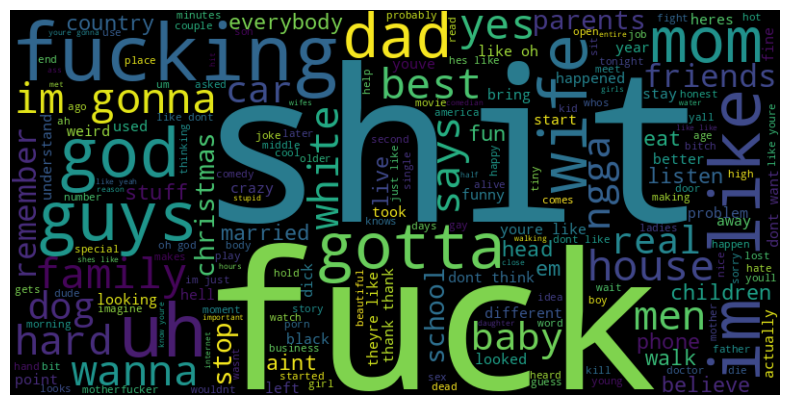

In [53]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names
terms = cv.get_feature_names_out()

term_frequencies = data_cv.sum(axis=0).A1  #.A1 converts the resulting sparse matrix into a flat NumPy array ,data_cv.sum(axis=0) returns the total frequency

# Create a dictionary of term frequencies
term_dict = dict(zip(terms, term_frequencies)) #'hello': 120, 'world': 95, 'funny': 88 , zip combines list pairwise

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(term_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #smooths the appearance
plt.axis('off')
plt.show()


# Bar Plot for 20 most frequent terms

In [54]:
import plotly.express as px
import pandas as pd

# get feature names
terms = cv.get_feature_names_out()
term_frequencies = data_cv.sum(axis=0).A1

term_df = pd.DataFrame({"term": terms, "frequency": term_frequencies})
term_df = term_df.sort_values(by="frequency", ascending=False).head(20)

fig = px.bar(
    term_df,
    x='frequency',
    y='term',
    orientation='h',
    title='Top 20 Most Frequent Terms',
    labels={'frequency': 'Frequency', 'term': 'Term'},
    height=600
)
fig.update_layout(yaxis=dict(autorange='reversed'))  # sort in decending order
fig.show()


## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [55]:
def clean_text_round2(text):
    '''Further cleans text by removing smart quotes, newlines, stray characters, and unwanted spaces.'''
    text = re.sub(r'http\S+|www\S+', '', text) #urls starting with http , www
    text = re.sub(r'\b(?:Mr|Mrs|Dr|Inc|Ltd|etc)\.?\b', '', text)  #Common Abbreviations
    text = re.sub(r'\s+[^\w\s]+\s+', ' ', text)  # Remove isolated punctuation
    text = re.sub(r'\d{1,2}:\d{2}', '', text)  # Remove timestamps like 12:34
    text = re.sub(r'<.*?>', '', text)          # Remove HTML tags if any
    return text.strip()

#r'--> backslashes are treated as literally

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    ngram_range=(1, 2),   # unigrams + bigrams
    min_df=3,             # term must appear in ≥3 documents
    max_df=0.8,           # term must appear in ≤80% of documents
    stop_words='english' # optional: remove common English stopwords
)
data_cv = vectorizer.fit_transform(data_clean.transcript)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer #bag-of-words model
import pandas as pd
import plotly.express as px

# Sample corpus
corpus = [
    "I love data science and machine learning.",
    "Machine learning is fun and powerful.",
    "Data science involves statistics and programming."
]

# Try different ngram ranges
ngram_settings = [(1, 1), (1, 2), (1, 3)]  # Unigrams, Bigrams, Trigrams
ngram_dfs = []

for ngram_range in ngram_settings:
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)

    term_freq = X.sum(axis=0).A1                 #.A1 flattens the result into a 1D array.
    terms = vectorizer.get_feature_names_out()

    df = pd.DataFrame({
        "term": terms,
        "frequency": term_freq,
        "ngram_range": [f"{ngram_range}" for _ in terms]
    })
    ngram_dfs.append(df)

# Combine dataframes
all_ngrams_df = pd.concat(ngram_dfs).sort_values(by="frequency", ascending=False)

# Plot
fig = px.bar(
    all_ngrams_df.head(30),  # Show top 30
    x='frequency',
    y='term',
    color='ngram_range',
    orientation='h',
    title='Top N-Grams Across Different ngram_range Settings',
    labels={'frequency': 'Frequency', 'term': 'Term/N-gram', 'ngram_range': 'N-gram Range'},
    height=700
)
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()


Common Unigrams (Single Words)

Words like "data", "learning", "machine", "science" appear frequently.

These are shown in blue and have relatively high frequencies.

Common Bigrams (Two Words)

Phrases like "data science", "machine learning", "fun powerful" are found.

These are in red and some are fairly frequent.

Frequent Trigrams (Three Words)

The green bars show that "data science" and "machine learning" are also common as trigrams, meaning they appeared as part of a 3-word sequence in the text.